# Kaggle API Authentication and Download

In [ ]:
#Connect to Kaggle

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d valentynsichkar/traffic-signs-dataset-in-yolo-format
!unzip traffic-signs-dataset-in-yolo-format.zip -d traffic_signs

Dataset URL: https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-dataset-in-yolo-format
License(s): other
 51% 127M/250M [00:00<00:00, 1.32GB/s]
100% 250M/250M [00:00<00:00, 731MB/s] 
Archive:  traffic-signs-dataset-in-yolo-format.zip
  inflating: traffic_signs/classes.names  
  inflating: traffic_signs/getting-full-path.py  
  inflating: traffic_signs/test.txt  
  inflating: traffic_signs/traffic-sign-to-test.mp4  
  inflating: traffic_signs/train.txt  
  inflating: traffic_signs/ts/ts/00000.jpg  
  inflating: traffic_signs/ts/ts/00000.txt  
  inflating: traffic_signs/ts/ts/00001.jpg  
  inflating: traffic_signs/ts/ts/00001.txt  
  inflating: traffic_signs/ts/ts/00002.jpg  
  inflating: traffic_signs/ts/ts/00002.txt  
  inflating: traffic_signs/ts/ts/00003.jpg  
  inflating: traffic_signs/ts/ts/00003.txt  
  inflating: traffic_signs/ts/ts/00004.jpg  
  inflating: traffic_signs/ts/ts/00004.txt  
  inflating: traffic_signs/ts/ts/00005.jpg  
  inflating: traffic_signs/ts/ts/000

# Dataset Formatting and YAML Configuration

In [ ]:
import os
import shutil
from pathlib import Path
import yaml

In [ ]:
base_dir = '/content/traffic_signs'
ts_dir = os.path.join('/content/traffic_signs/ts', 'ts')


for split in ['train', 'val']:  # Create YOLO-style directories for images and labels
    os.makedirs(os.path.join(base_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'labels', split), exist_ok=True)


In [ ]:
def copy_files(txt_file, split):
    with open(txt_file, 'r') as f:
        lines = f.read().splitlines()

    for line in lines:
        file_name = os.path.basename(line)
        img_src = os.path.join(ts_dir, file_name)
        label_src = os.path.splitext(img_src)[0] + '.txt'

        img_dst = os.path.join(base_dir, 'images', split, file_name)
        label_dst = os.path.join(base_dir, 'labels', split, os.path.basename(label_src))

        if os.path.exists(img_src) and os.path.exists(label_src):
            shutil.copy(img_src, img_dst)
            shutil.copy(label_src, label_dst)

In [ ]:
copy_files(f'{base_dir}/train.txt', 'train')
copy_files(f'{base_dir}/test.txt', 'val')


In [ ]:
#YAML File

with open(f"{base_dir}/classes.names", 'r') as f:
    class_names = [line.strip() for line in f.readlines()]
num_classes = len(class_names)

data_yaml = {
    'path': base_dir,
    'train': 'images/train',
    'val': 'images/val',
    'nc': num_classes,
    'names': class_names
}

with open(f"{base_dir}/data.yaml", 'w') as f:
    yaml.dump(data_yaml, f)

In [ ]:
!ls /content/traffic_signs/labels/train | head

00000.txt
00001.txt
00003.txt
00005.txt
00006.txt
00007.txt
00008.txt
00009.txt
00010.txt
00011.txt


# YOLOv8

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # YOLOv8nano
model.train(data="/content/traffic_signs/data.yaml", epochs=50, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 187MB/s]

Ultralytics 8.3.151 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/traffic_signs/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 151MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2609.3±681.9 MB/s, size: 336.7 KB)


train: Scanning /content/traffic_signs/labels/train... 630 images, 0 backgrounds, 0 corrupt: 100%|██████████| 630/630 [00:00<00:00, 2292.51it/s]

train: /content/traffic_signs/images/train/00340.jpg: 1 duplicate labels removed
train: New cache created: /content/traffic_signs/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1788.6±1103.8 MB/s, size: 342.1 KB)


val: Scanning /content/traffic_signs/labels/val... 111 images, 0 backgrounds, 0 corrupt: 100%|██████████| 111/111 [00:00<00:00, 872.35it/s]

val: New cache created: /content/traffic_signs/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.09G      1.522      4.475     0.9469         17        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        111        179   0.000529     0.0887     0.0369     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.21G      1.262      2.543     0.8793         17        640: 100%|██████████| 40/40 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        111        179      0.711      0.283       0.57      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.22G      1.202      2.028     0.8705         15        640: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        111        179      0.909      0.611      0.771       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.22G      1.065      1.605     0.8599         16        640: 100%|██████████| 40/40 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


                   all        111        179      0.932      0.726      0.849      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.22G      1.043      1.429      0.856         16        640: 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


                   all        111        179      0.869      0.761      0.864      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.22G     0.9993      1.287     0.8593         20        640: 100%|██████████| 40/40 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        111        179       0.86      0.782      0.856      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.22G     0.9723      1.144     0.8394         12        640: 100%|██████████| 40/40 [00:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        111        179      0.912      0.746      0.862      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.22G     0.9871      1.062     0.8489         18        640: 100%|██████████| 40/40 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        111        179      0.937      0.739      0.875      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G      0.983     0.9943     0.8427         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        111        179      0.949      0.837      0.926      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.24G     0.9085     0.9286      0.839         19        640: 100%|██████████| 40/40 [00:13<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        111        179      0.872      0.865      0.917      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.26G     0.9053     0.8553      0.834         10        640: 100%|██████████| 40/40 [00:13<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        111        179      0.931      0.756      0.888      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.28G     0.8802     0.8042     0.8341         13        640: 100%|██████████| 40/40 [00:13<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        111        179      0.943        0.8      0.906      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.29G     0.8241     0.7551     0.8269         13        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        111        179       0.95      0.818      0.906      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.31G     0.8754     0.7435     0.8269         10        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        111        179      0.936      0.831      0.928      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.33G     0.8259     0.6881      0.814         21        640: 100%|██████████| 40/40 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        111        179      0.933      0.819      0.914      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.35G     0.8627     0.7049     0.8277         13        640: 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        111        179      0.949      0.827      0.919       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.36G       0.88     0.6809     0.8266         12        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        111        179      0.918      0.869      0.939      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G     0.8547     0.6473     0.8178         16        640: 100%|██████████| 40/40 [00:13<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        111        179      0.918      0.873      0.943      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.38G     0.8343     0.6253     0.8245         13        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        111        179      0.941      0.863      0.935       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.38G     0.7979      0.601     0.8181         16        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        111        179      0.956      0.838      0.932      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.38G      0.788     0.6119     0.8215         16        640: 100%|██████████| 40/40 [00:13<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        111        179      0.883      0.876      0.931      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.38G     0.8033     0.6042     0.8119         21        640: 100%|██████████| 40/40 [00:13<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]


                   all        111        179        0.9      0.864      0.915      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.38G     0.7849     0.5958     0.8164         11        640: 100%|██████████| 40/40 [00:13<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        111        179       0.96      0.797      0.933      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G      0.809     0.5872     0.8125         18        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]


                   all        111        179      0.929      0.822      0.927      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.38G     0.7605     0.5617      0.814         24        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        111        179      0.949      0.847      0.931      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.38G      0.779     0.5809     0.8084         16        640: 100%|██████████| 40/40 [00:13<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        111        179      0.946      0.834      0.934      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.38G     0.7701     0.5445     0.8174         15        640: 100%|██████████| 40/40 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        111        179      0.867      0.896      0.939      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.38G     0.7386     0.5327     0.8118         20        640: 100%|██████████| 40/40 [00:13<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        111        179      0.968      0.842      0.937      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.38G     0.7372      0.523     0.8064         13        640: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        111        179      0.959      0.862      0.934      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.38G     0.7257     0.5165     0.8096         13        640: 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all        111        179      0.963      0.875      0.941      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.38G     0.7331     0.5087     0.8089         12        640: 100%|██████████| 40/40 [00:13<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        111        179      0.934       0.87      0.931      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.38G     0.7113     0.4861      0.809         13        640: 100%|██████████| 40/40 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        111        179      0.883      0.915      0.934      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.38G     0.7286     0.4927      0.806         20        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        111        179      0.913      0.884      0.939      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.38G     0.7182     0.5022     0.8043         20        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]


                   all        111        179      0.929      0.865      0.933      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.38G     0.6845     0.4824     0.8006         14        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        111        179      0.946      0.874      0.946      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.38G     0.6972     0.4626     0.8084         18        640: 100%|██████████| 40/40 [00:13<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        111        179      0.944      0.869      0.944       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.38G     0.6899     0.4672     0.7999         24        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        111        179      0.987      0.869      0.957      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.38G     0.7052     0.4733     0.8013         26        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        111        179      0.983       0.86      0.946      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.38G     0.6728     0.4562     0.7998         10        640: 100%|██████████| 40/40 [00:13<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        111        179      0.963      0.869      0.949       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.38G      0.669     0.4505     0.7984         19        640: 100%|██████████| 40/40 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        111        179       0.97      0.879      0.957      0.783


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.38G     0.6457     0.4498     0.7965          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        111        179      0.947      0.892       0.95      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.38G     0.6512     0.4422     0.7931          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        111        179       0.97      0.856      0.951      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.38G     0.6058     0.4119     0.8021         13        640: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        111        179      0.952      0.876      0.955      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.38G     0.6163     0.4235     0.7982          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        111        179       0.96      0.891      0.961      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.38G     0.6216     0.4116     0.8025          7        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        111        179      0.953      0.882      0.948       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.38G      0.601     0.4022     0.7966          8        640: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        111        179      0.951      0.883      0.946      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.38G     0.6007     0.4111     0.8007         11        640: 100%|██████████| 40/40 [00:13<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        111        179      0.947      0.873      0.949      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.38G     0.5878     0.3908     0.7863          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        111        179      0.952      0.881      0.945      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.38G     0.6075     0.4062     0.7835          7        640: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        111        179      0.957      0.879      0.944      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.38G     0.5843     0.3892      0.796         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        111        179      0.944       0.88      0.943      0.793



50 epochs completed in 0.214 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.151 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


                   all        111        179      0.952      0.881      0.945      0.794
           prohibitory         51         71      0.933      0.944      0.981      0.837
                danger         30         36      0.972      0.967      0.991      0.847
             mandatory         23         23      0.929      0.826      0.885      0.758
                 other         36         49      0.975      0.786      0.925      0.733
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f344b096390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
#Get top-performing epoch and metrics yolov8n
import pandas as pd

results_path = 'runs/detect/train/results.csv'

df = pd.read_csv(results_path)

best_epoch = df['metrics/mAP50(B)'].idxmax()
best_metrics = df.iloc[best_epoch]

yolov8_best_epoch= best_epoch
yolov8_precision = best_metrics['metrics/precision(B)']
yolov8_recall = best_metrics['metrics/recall(B)']
yolov8_map50 = best_metrics['metrics/mAP50(B)']
yolov8_mAP50_95 = best_metrics['metrics/mAP50-95(B)']

print(f"Best Epoch: {yolov8_best_epoch}")
print(f"Precision: {yolov8_precision}")
print(f"Recall: {yolov8_recall}")
print(f"mAP_0.5: {yolov8_map50}")
print(f"mAP_0.5:0.95: {yolov8_mAP50_95}")


Best Epoch: 43
Precision: 0.95955
Recall: 0.89083
mAP_0.5: 0.96097
mAP_0.5:0.95: 0.77795


# Test

In [ ]:
!ls runs/detect/train/weights/

best.pt  last.pt


In [ ]:
image_path = "/content/traffic_signs/images/val/00002.jpg"

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

results = model.predict(source=image_path, conf=0.25, save=True, save_txt=True)


image 1/1 /content/traffic_signs/images/val/00002.jpg: 384x640 1 mandatory, 16.2ms
Speed: 3.8ms preprocess, 16.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
1 label saved to runs/detect/predict3/labels


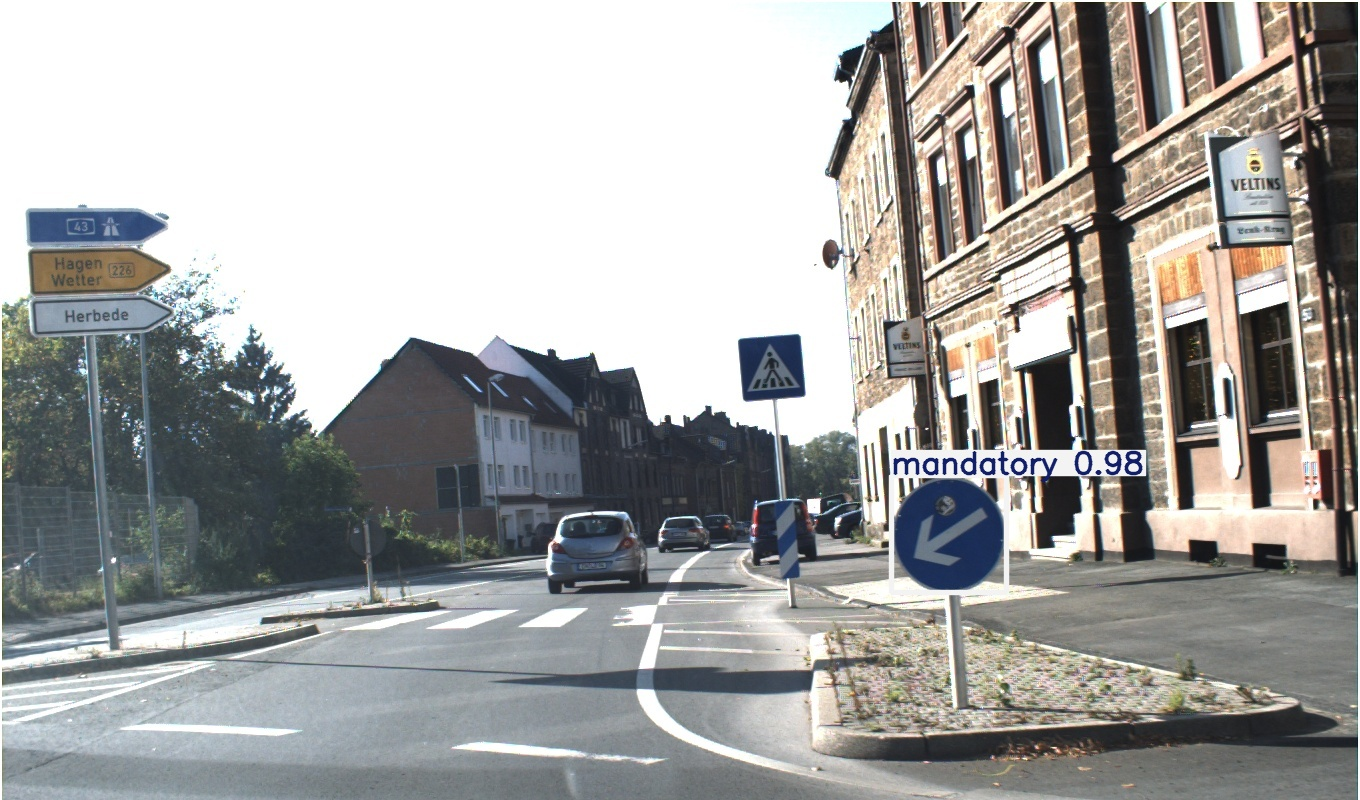

In [ ]:
from IPython.display import Image, display
import glob

output_image = glob.glob('runs/detect/predict3/*.jpg')[0]
display(Image(filename=output_image))

In [ ]:
!cat runs/detect/predict3/labels/00002.txt

2 0.698016 0.667299 0.084773 0.146483


# Video Test

In [ ]:
results = model.predict(
    source="/content/traffic_signs/traffic-sign-to-test.mp4",
    conf=0.25,
    save=True,
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/56) /content/traffic_signs/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 8.9ms
video 1/1 (frame 2/56) /content/traffic_signs/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 9.7ms
video 1/1 (frame 3/56) /content/traffic_signs/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 7.3ms
video 1/1 (frame 4/56) /content/traffic_signs/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 12.8ms
video 1/1 (frame 5/56) /content/traffic_signs/t

In [ ]:
!ls runs/detect/predict3/


00002.jpg  labels  traffic-sign-to-test.avi


In [ ]:
#avi to mp4
!ffmpeg -i /content/runs/detect/predict3/traffic-sign-to-test.avi \
        -vcodec libx264 -crf 23 /content/runs/detect/predict3/traffic-sign-to-test.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import Video
Video('/content/runs/detect/predict3/traffic-sign-to-test.mp4', embed=True)


# YOLOv5


In [ ]:
#Clone YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17488, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17488 (delta 0), reused 0 (delta 0), pack-reused 17487 (from 2)
Receiving objects: 100% (17488/17488), 16.54 MiB | 28.95 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/traffic_signs/data.yaml \
  --weights yolov5s.pt \ #YOLOv5 small
  --name yolov5_traffic_signs


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-07 20:14:54.317315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749327294.574459    3634 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749327294.648821    3634 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
df = pd.read_csv('runs/train/yolov5_traffic_signs/results.csv')

best_epoch = df['     metrics/mAP_0.5'].idxmax()
best_metrics_v5 = df.iloc[best_epoch]

In [ ]:
print(df.columns.tolist())

['               epoch', '      train/box_loss', '      train/obj_loss', '      train/cls_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss', '        val/obj_loss', '        val/cls_loss', '               x/lr0', '               x/lr1', '               x/lr2']


In [ ]:
##Get top-performing epoch and metrics YOLOv5s
yolov5_precision = best_metrics_v5['   metrics/precision']
yolov5_recall = best_metrics_v5['      metrics/recall']
yolov5_mAP_05 = best_metrics_v5['     metrics/mAP_0.5']
yolov5_mAP_05_95 = best_metrics_v5['metrics/mAP_0.5:0.95']

print(f"Precision: {yolov5_precision}")
print(f"Recall: {yolov5_recall}")
print(f"mAP_0.5: {yolov5_mAP_05}")
print(f"mAP_0.5:0.95: {yolov5_mAP_05_95}")

Precision: 0.9595
Recall: 0.90931
mAP_0.5: 0.96951
mAP_0.5:0.95: 0.74766


# Comparison

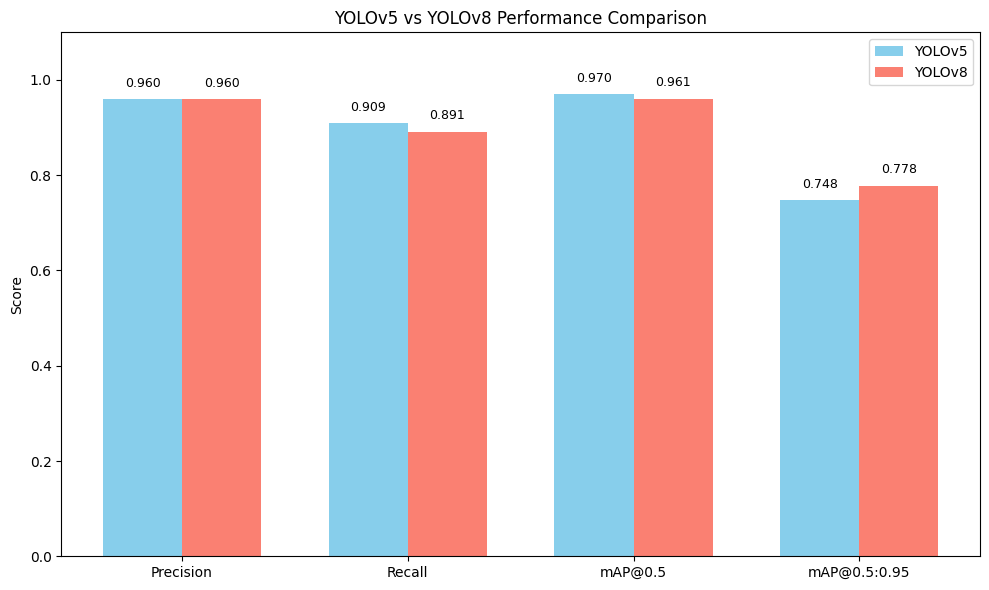

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']

yolov5_scores = [yolov5_precision,yolov5_recall,yolov5_mAP_05,yolov5_mAP_05_95]
yolov8_scores = [yolov8_precision,yolov8_recall,yolov8_map50,yolov8_mAP50_95]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, yolov5_scores, width, label='YOLOv5', color='skyblue')
bars2 = ax.bar(x + width/2, yolov8_scores, width, label='YOLOv8', color='salmon')

ax.set_ylabel('Score')
ax.set_title('YOLOv5 vs YOLOv8 Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
